In [14]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import warnings
from scipy import stats
warnings.filterwarnings('ignore')


In [16]:
!ls

Group Project 1 outline.docx cost_of_living_us.csv
README.md                    rank_totalcost.csv
avg_total_cost_of_living.csv total_cost.csv
correlation analysis.ipynb   updated_cities.csv
cost_of_living_clean.ipynb


In [18]:
# created a csv of Vraj's population dataframe 
#loaded the (2) DataFrames - population and total cost of living 

df1 = pd.read_csv(r"updated_cities.csv")
df2 = pd.read_csv(r"avg_total_cost_of_living.csv")

In [20]:
df1.head(11)

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2)
0,1,New York,New York,8097282,8740292,-0.0195,26950,300.46
1,2,Los Angeles,California,3795936,3895848,-0.0065,8068,470.52
2,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75
3,4,Houston,Texas,2319119,2299269,0.0021,3620,640.61
4,5,Phoenix,Arizona,1662607,1612459,0.0076,3208,518.33
5,6,Philadelphia,Pennsylvania,1533828,1600684,-0.0108,11416,134.36
6,7,San Antonio,Texas,1513974,1439257,0.0125,3034,498.92
7,8,San Diego,California,1388996,1386292,0.0005,4260,326.09
8,9,Dallas,Texas,1302753,1303212,-0.0001,3835,339.68
9,10,Jacksonville,Florida,997164,951880,0.0115,1334,747.26


In [22]:
df2.head()

,City,Average_Total_Cost
0,Atlanta,75559.66
1,Austin,70092.91
2,Boston,105947.07
3,Chicago,89801.78
4,Denver,94948.03


In [24]:
df2.rename(columns={'City': 'US City'}, inplace=True)

In [26]:
df2.head(10)

,US City,Average_Total_Cost
0,Atlanta,75559.66
1,Austin,70092.91
2,Boston,105947.07
3,Chicago,89801.78
4,Denver,94948.03
5,Los Angeles,97766.39
6,Nashville,74589.04
7,New York,122290.97
8,San Diego,106769.00
9,Tampa,75533.99


In [28]:
# merge with the common column
merged_df = pd.merge(df1, df2, on='US City') 

In [30]:
merged_df.head(11)

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2),Average_Total_Cost
0,1,New York,New York,8097282,8740292,-0.0195,26950,300.46,122290.97
1,2,Los Angeles,California,3795936,3895848,-0.0065,8068,470.52,97766.39
2,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75,89801.78
3,8,San Diego,California,1388996,1386292,0.0005,4260,326.09,106769.00
4,12,Austin,Texas,984567,965827,0.0048,3017,326.37,70092.91
5,19,Denver,Colorado,716234,717606,-0.0005,4679,153.07,94948.03
6,21,Nashville,Tennessee,687150,689700,-0.0009,1445,475.57,74589.04
7,25,Boston,Massachusetts,646622,675466,-0.0110,13377,48.34,105947.07
8,36,Atlanta,Georgia,514465,499896,0.0071,3804,135.25,75559.66
9,49,Tampa,Florida,408510,387924,0.0128,3595,113.64,75533.99


In [32]:
merged_df.rename(columns={'Average_Total_Cost': 'Total Cost'}, inplace=True)

In [34]:
merged_df.head(10)

,Rank,US City,US State,Population 2024,Population 2020,Annual Change,Density (/mile2),Area (mile2),Total Cost
0,1,New York,New York,8097282,8740292,-0.0195,26950,300.46,122290.97
1,2,Los Angeles,California,3795936,3895848,-0.0065,8068,470.52,97766.39
2,3,Chicago,Illinois,2638159,2743329,-0.0099,11584,227.75,89801.78
3,8,San Diego,California,1388996,1386292,0.0005,4260,326.09,106769.00
4,12,Austin,Texas,984567,965827,0.0048,3017,326.37,70092.91
5,19,Denver,Colorado,716234,717606,-0.0005,4679,153.07,94948.03
6,21,Nashville,Tennessee,687150,689700,-0.0009,1445,475.57,74589.04
7,25,Boston,Massachusetts,646622,675466,-0.0110,13377,48.34,105947.07
8,36,Atlanta,Georgia,514465,499896,0.0071,3804,135.25,75559.66
9,49,Tampa,Florida,408510,387924,0.0128,3595,113.64,75533.99


In [36]:
#define the variable
x_values = merged_df['Total Cost']  
y_values = merged_df['Population 2024']  

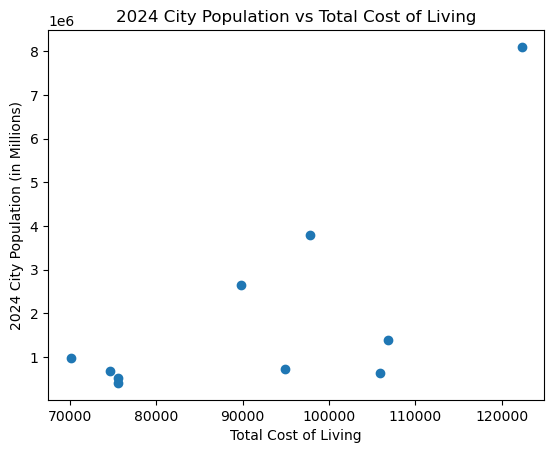

In [38]:
plt.xlabel("Total Cost of Living")
plt.ylabel("2024 City Population (in Millions)")
plt.title("2024 City Population vs Total Cost of Living")
#plt.xticks(range(0, 150000,20000))
#plt.xlim(60000,150000)
#plt.ylim(0,9000000)
#plt.yticks(range(0, 9000000,1000000))
plt.tight_layout
plt.scatter(x_values, y_values)
plt.show()



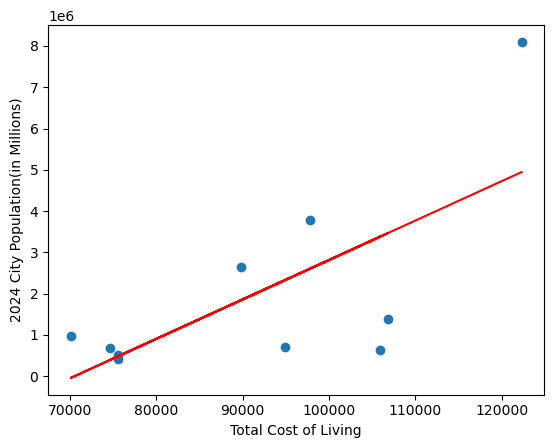

In [40]:
# Create a line regression graph
x_values = merged_df['Total Cost']  
y_values = merged_df['Population 2024']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Total Cost of Living')
plt.ylabel('2024 City Population(in Millions)')
plt.show()

In [42]:
correlation = stats.pearsonr(x_values, y_values)
print(f"The correlation is {correlation[0]}")

The correlation is 0.6868773439198397
